In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,plot_confusion_matrix,recall_score
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [24]:
train = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/tweet_sent_train.csv')
test = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/tweet_sent_test.csv')

In [25]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [26]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
train.shape

(7920, 3)

In [6]:
test.shape

(1953, 2)

In [8]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [11]:
train.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [12]:
test.head()

,tweet
0,I hate the new #iphone upgrade. Won't let me d...
1,currently shitting my fucking pants. #apple #i...
2,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,My ipod is officially dead. I lost all my pict...
4,Been fighting iTunes all night! I only want th...


In [27]:
X = train['tweet']
y = train['label']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [29]:
newdata = test['tweet']
tweetid = test.set_index('id')
tweet_index = tweetid.index

In [76]:
# implement transform methods and fit on training test

text = Pipeline([('tfidf',TfidfVectorizer()),('classify',LinearSVC())])
text.fit(X_train,y_train)
text.score(X_test,y_test)*100

89.70959595959596

In [70]:
# XGBoost

rf = Pipeline([('tfidf',TfidfVectorizer()),('classify',RandomForestClassifier())])
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

88.88888888888889

In [77]:
y_pred = text.predict(X_test)

In [78]:
f1_score(y_test,y_pred,average="macro")*100

86.33678487495548

In [79]:
precision_score(y_test,y_pred,average="macro")*100

85.95514089152766

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1192
           1       0.78      0.81      0.80       392

    accuracy                           0.90      1584
   macro avg       0.86      0.87      0.86      1584
weighted avg       0.90      0.90      0.90      1584



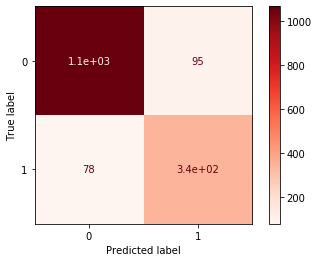

In [35]:
plot_confusion_matrix(text,X_test,y_test,cmap=plt.cm.Reds);

In [81]:
pred = text.predict(newdata)

In [82]:
table = {'id':tweet_index,'label':np.round(pred,0)}
submission = pd.DataFrame(table)
final_subm = submission[['id','label']]

In [83]:
final_subm.to_csv('tweet_Sent3.csv')